## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l1, l2, l1_l2 

def build_mlp(input_shape,output_units=10,regularizer='l1'):
    """Code Here
    建立你的神經網路
    """
    Input_layer=keras.layers.Input(input_shape)
    if regularizer=='l1':
        x=keras.layers.Dense(units=128,activation='relu')(Input_layer)
        x = BatchNormalization()(x)
        x=Dropout(0.2)(x)
        x=keras.layers.Dense(units=52,activation='relu',kernel_regularizer=l1(0.0001))(x)
        x=Dropout(0.2)(x)
    elif regularizer=='l2':
        x=keras.layers.Dense(units=128,activation='relu')(Input_layer)
        x = BatchNormalization()(x)
        x=Dropout(0.2)(x)
        x=keras.layers.Dense(units=52,activation='relu',kernel_regularizer=l2(0.0001))(x)
        x=Dropout(0.2)(x)
    else:
        x=keras.layers.Dense(units=128,activation='relu')(Input_layer)
        x = BatchNormalization()(x)
        x=Dropout(0.2)(x)
        x=keras.layers.Dense(units=52,activation='relu',kernel_regularizer=l1_l2(0.0001))(x)
        x=Dropout(0.2)(x)
    
    out=keras.layers.Dense(units=output_units, activation="softmax")(x)
    model=keras.models.Model(inputs=[Input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
REGULARIZER=['l1','l2','l1_l2']

In [26]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regular in REGULARIZER:
    keras.backend.clear_session()
    print ('The regularization is : ' ,regular)
    model=build_mlp(input_shape=x_train.shape[1:],regularizer=regular)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='sgd')
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "regularization : %s" % regular
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

The regularization is :  l1
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.1978 - acc: 0.2412 - val_loss: 1.9349 - val_acc: 0.3473
Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9889 - acc: 0.3141 - val_loss: 1.8708 - val_acc: 0.3554
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.9193 - acc: 0.3381 - val_loss: 1.8030 - val_acc: 0.3918
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8690 - acc: 0.3616 - val_loss: 1.7703 - val_acc: 0.4000
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.8364 - acc: 0.3706 - val_loss: 1.7698 - val_acc: 0.3941
Epoch 6/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.8091 - acc: 0.3807 - val_loss: 1.7257 - val_acc: 0.4098
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7823 - acc: 

50000/50000 [==============================] - 7s 150us/step - loss: 1.7148 - acc: 0.3920 - val_loss: 1.6252 - val_acc: 0.4303
Epoch 9/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7001 - acc: 0.3980 - val_loss: 1.6147 - val_acc: 0.4347
Epoch 10/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6821 - acc: 0.4020 - val_loss: 1.6124 - val_acc: 0.4316
Epoch 11/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6651 - acc: 0.4111 - val_loss: 1.6278 - val_acc: 0.4251
Epoch 12/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6617 - acc: 0.4122 - val_loss: 1.5955 - val_acc: 0.4398
Epoch 13/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.6497 - acc: 0.4154 - val_loss: 1.5703 - val_acc: 0.4478
Epoch 14/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6364 - acc: 0.4213 - val_loss: 1.5848 - val_acc: 0.4376
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 8s 168us/step - loss: 2.2073 - acc: 0.3874 - val_loss: 2.1098 - val_acc: 0.4187
Epoch 8/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.1553 - acc: 0.3901 - val_loss: 2.0648 - val_acc: 0.4206
Epoch 9/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1099 - acc: 0.3952 - val_loss: 2.0270 - val_acc: 0.4311
Epoch 10/50
50000/50000 [==============================] - 9s 171us/step - loss: 2.0632 - acc: 0.4012 - val_loss: 1.9915 - val_acc: 0.4333
Epoch 11/50
50000/50000 [==============================] - 8s 170us/step - loss: 2.0244 - acc: 0.4077 - val_loss: 1.9668 - val_acc: 0.4199
Epoch 12/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.9831 - acc: 0.4128 - val_loss: 1.9153 - val_acc: 0.4431
Epoch 13/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.9503 - acc: 0.4188 - val_loss: 1.8939 - val_acc: 0.4395
Epoch 14/50
50000/50000 [================

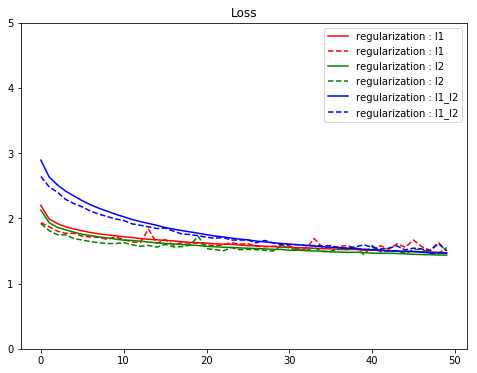

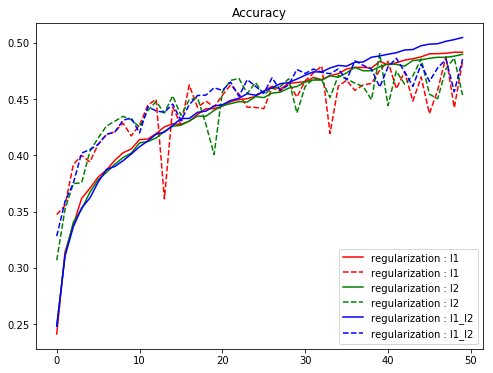

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()